# Assignment 1

First we need to import a few modules, execute the cell below:

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [29]:

def f(x):
    f = numpy.cos(x)

    return f;
assert numpy.isclose(f(0.5),0.87758256189)

You can use the following cell to check that your code works for scalar arguments:

In [30]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [31]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [32]:
import numpy as np

def df_analytic(x):   
    f =-numpy.sin(x)
    return f;


In [33]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [34]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [35]:
import numpy as np

def backward_difference(f, x, dx):
    v = (f(x)-f(x-dx))/dx
    return v;
backward_difference(f, 0.1, 0.0001) 

-0.09978366627194646

In [36]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


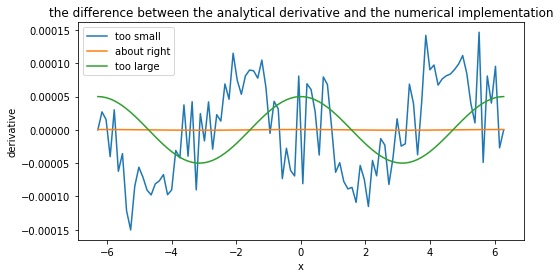

In [85]:
import numpy 
import matplotlib.pyplot as plt



plt.figure(figsize=(8, 4))
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)

df_dx_1 = backward_difference(f, xs, dx=1e-12)
df_dx_2 = backward_difference(f, xs, dx=1e-6)
df_dx_3 = backward_difference(f, xs, dx=1e-4)

df_dx_analytical = df_analytic(xs)

plt.plot(xs, df_dx_1 - df_dx_analytical,label = "too small")

plt.plot(xs, df_dx_2 - df_dx_analytical,label = "about right") 

plt.plot(xs, df_dx_3 - df_dx_analytical,label = "too large") 

plt.xlabel("x")
plt.ylabel("derivative")
plt.title("the difference between the analytical derivative and the numerical implementation")
plt.legend();




**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


The numerical method looses accuracy in the case where $\Delta x$ is small and in the case where it is large because the computer can only store a finite amount of decimal numbers. For this reason, when it performs calculations, numbers past a certain decimal place are discarded by the computer so part of the information is lost, meaning that the computer sometimes 'makes up' decimal places if that information is needed later on in the calculation.
To illustrate, imagine a computer has 5 digits precision for x, so $x = 1.23456⋅10^{-3}$
Doing $1+x$ gives $1.00123$ (represented as $1.00123⋅10^0$) and now substract $1$, we get $1.23⋆⋆⋆ ⋅ 10^{-3}$, with the computer having to make up the lost information